In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder
from sklearn.compose import make_column_transformer
from sklearn.model_selection import train_test_split

The attributes related with eating habits are: Frequent consumption of high caloric food (FAVC), Frequency of consumption of vegetables (FCVC), Number of main meals (NCP), Consumption of food between meals (CAEC), Consumption of water daily (CH20), and Consumption of alcohol (CALC). The attributes related with the physical condition are: Calories consumption monitoring (SCC), Physical activity frequency (FAF), Time using technology devices (TUE), Transportation used (MTRANS), other variables obtained were: Gender, Age, Height and Weight. Finally, all data was labeled and the class variable NObesity was created with the values of: Insufficient Weight, Normal Weight, Overweight Level I, Overweight Level II, Obesity Type I, Obesity Type II and Obesity Type III, based on Equation (1) and information from WHO and Mexican Normativity. The data contains numerical data and continous data, so it can be used for analysis based on algorithms of classification, prediction, segmentation and association. Data is available in CSV format and ARFF format to be used with the Weka too

In [2]:
raw_data = pd.read_csv('./ObesityDataSet_raw_and_data_sinthetic.csv')
raw_data.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [3]:
train_set, test_set = train_test_split(raw_data, test_size=.2, random_state=42)

In [4]:
category_consumption = ['no', 'Sometimes', 'Frequently', 'Always'] 
category_transport = ['Automobile', 'Motorbike', 'Public_Transportation', 'Bike', 'Walking']
obesity_level_encoder = LabelEncoder()

In [5]:
x_train = train_set.iloc[:, :-1]
y_train = obesity_level_encoder.fit_transform(train_set.NObeyesdad)

In [6]:
ordinal_encoder = make_column_transformer(
    (OrdinalEncoder(), ['Gender', 'family_history_with_overweight', 'FAVC', 'SMOKE', 'SCC']),
    (OrdinalEncoder(categories=[category_consumption, category_consumption]), ['CALC', 'CAEC']),
    (OrdinalEncoder(categories=[category_transport]), ['MTRANS']),
    remainder='passthrough'
)

In [7]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import confusion_matrix, plot_precision_recall_curve

In [8]:
criterion = ['gini', 'entropy']
max_depth = [2,4,6,8,10,12]

tree_parameters = {
    'model__max_depth': max_depth,
    'model__criterion': criterion
}

knn_parameters = {
    'model__n_neighbors': [3, 5, 7, 8, 11]
}

svc_parameters = {
    'model__C': [0.1, 1, 10, 100], 
    'model__gamma': [1, 0.1, 0.01, 0.001],
    'model__kernel': ['rbf', 'poly', 'sigmoid']
}

model = DecisionTreeClassifier()
# model = KNeighborsClassifier()
# model = GaussianNB()
# model = svm.SVC()

In [9]:
pipe = Pipeline([
        ('ord_enc', ordinal_encoder),
        ('scaler', StandardScaler()),
        ('model', model)
    ]
)
pipe.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'ord_enc', 'scaler', 'model', 'ord_enc__n_jobs', 'ord_enc__remainder', 'ord_enc__sparse_threshold', 'ord_enc__transformer_weights', 'ord_enc__transformers', 'ord_enc__verbose', 'ord_enc__ordinalencoder-1', 'ord_enc__ordinalencoder-2', 'ord_enc__ordinalencoder-3', 'ord_enc__ordinalencoder-1__categories', 'ord_enc__ordinalencoder-1__dtype', 'ord_enc__ordinalencoder-1__handle_unknown', 'ord_enc__ordinalencoder-1__unknown_value', 'ord_enc__ordinalencoder-2__categories', 'ord_enc__ordinalencoder-2__dtype', 'ord_enc__ordinalencoder-2__handle_unknown', 'ord_enc__ordinalencoder-2__unknown_value', 'ord_enc__ordinalencoder-3__categories', 'ord_enc__ordinalencoder-3__dtype', 'ord_enc__ordinalencoder-3__handle_unknown', 'ord_enc__ordinalencoder-3__unknown_value', 'scaler__copy', 'scaler__with_mean', 'scaler__with_std', 'model__ccp_alpha', 'model__class_weight', 'model__criterion', 'model__max_depth', 'model__max_features', 'model__max_leaf_nodes', 'model__m

In [10]:
# parameters = {}
parameters = tree_parameters
# parameters = knn_parameters
# parameters = svc_parameters

grid = GridSearchCV(pipe, parameters)
grid.fit(x_train, y_train);
pd.DataFrame(grid.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__criterion,param_model__max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.015015,0.001139,0.006415,0.000118,gini,2,"{'model__criterion': 'gini', 'model__max_depth...",0.562130,0.556213,0.547337,0.551929,0.557864,0.555095,0.005072,11
1,0.016796,0.000491,0.006796,0.000112,gini,4,"{'model__criterion': 'gini', 'model__max_depth...",0.754438,0.792899,0.781065,0.765579,0.759644,0.770725,0.014235,9
2,0.018291,0.000181,0.007024,0.000269,gini,6,"{'model__criterion': 'gini', 'model__max_depth...",0.866864,0.887574,0.926036,0.866469,0.910979,0.891584,0.023753,7
3,0.019348,0.000804,0.006871,0.000156,gini,8,"{'model__criterion': 'gini', 'model__max_depth...",0.914201,0.914201,0.911243,0.916914,0.905045,0.912321,0.004056,6
4,0.020437,0.002155,0.007045,0.000338,gini,10,"{'model__criterion': 'gini', 'model__max_depth...",0.931953,0.911243,0.911243,0.922849,0.922849,0.920027,0.007905,5
5,0.022128,0.002942,0.008137,0.001164,gini,12,"{'model__criterion': 'gini', 'model__max_depth...",0.926036,0.911243,0.928994,0.928783,0.934718,0.925955,0.007880,4
6,0.031363,0.002162,0.012645,0.002475,entropy,2,"{'model__criterion': 'entropy', 'model__max_de...",0.553254,0.553254,0.550296,0.551929,0.557864,0.553319,0.002519,12
7,0.032258,0.009267,0.011623,0.004874,entropy,4,"{'model__criterion': 'entropy', 'model__max_de...",0.775148,0.751479,0.739645,0.729970,0.750742,0.749397,0.015111,10
8,0.026184,0.000517,0.007147,0.000302,entropy,6,"{'model__criterion': 'entropy', 'model__max_de...",0.890533,0.866864,0.899408,0.878338,0.902077,0.887444,0.013216,8
9,0.038132,0.003674,0.010176,0.001956,entropy,8,"{'model__criterion': 'entropy', 'model__max_de...",0.928994,0.940828,0.949704,0.940653,0.943620,0.940760,0.006732,3


In [11]:
x_test = test_set.iloc[:, :-1]
y_test = obesity_level_encoder.transform(test_set.NObeyesdad)

array([0.81176471, 0.77647059, 0.89411765, 0.89285714, 0.86904762])

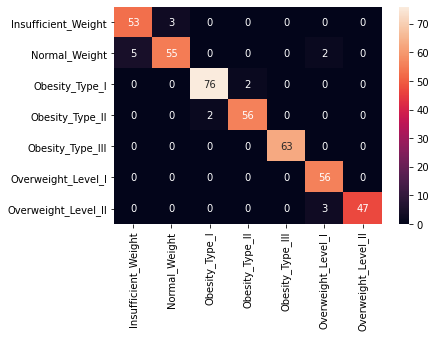

In [12]:
y_predict = grid.predict(x_test)
sns.heatmap(confusion_matrix(y_test, y_predict), 
            annot=True,
            xticklabels=obesity_level_encoder.classes_,
            yticklabels=obesity_level_encoder.classes_
           );
cross_val_score(grid, x_test, y_test, cv=5)